# Binary search

1. Implement the code below for finding a randomly selected number on a given grid.
2. Run the illustration after completing the algorithm implementation

In [1]:
# Replace ??? with your code

def binary_search(grid=[0,1],val=0):
  '''Returns the index of val on the sorted grid
  '''
  i1,i2 = 0,len(grid)-1
  if val==grid[i1]: return i1
  if val==grid[i2]: return i2
  j= (i1 + i2) // 2 # divide in half
  while grid[j]!=val:
    if val>grid[j]: 
      i1=j
    else: 
      i2=j
    j=(i1 + i2) // 2 # divide in half
  return j

In [2]:
import numpy as np
N = 10
# random sorted sequence of integers up to 100
x = np.random.choice(100,size=N,replace=False)
x = np.sort(x)
# random choice of one number/index
k0 = np.random.choice(N,size=1)
k1 = binary_search(grid=x,val=x[k0])
print(f'Index of x{k0}={x[k0]} in {x} is {k1}')

Index of x[2]=[26] in [21 22 26 43 60 62 65 81 95 97] is 2


The following code illustrates how run-time grows with the length of the list.

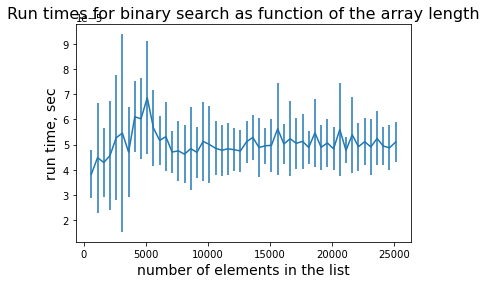

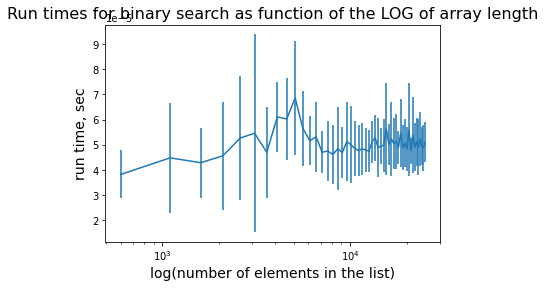

In [14]:
import matplotlib.pyplot as plt

N = 50  # number of points
kk = lambda i: 100+(i+1)*500  # step formula
# precompute the sorted sequence of integers of max length
vv = np.random.choice(10*kk(N),size=kk(N),replace=False)
vv = np.sort(vv)

n,x,std = [0]*N,[0]*N,[0]*N   # initialize lists
for i in range(N):
  n[i] = kk(i)  # number of list elements
  # randomize the choice in each run to smooth out simulation error
  t = %timeit -n10 -r100 -o -q binary_search(grid=vv[:n[i]],val=vv[np.random.choice(n[i],size=1)])
  x[i] = t.average
  std[i] = t.stdev

plt.errorbar(n,x,std)
plt.xlabel('number of elements in the list', fontsize=14)
plt.ylabel('run time, sec', fontsize=14)
plt.title("Run times for binary search as function of the array length",fontsize=16)
plt.show()

plt.errorbar(n,x,std)
plt.xscale('log')
plt.xlabel('log(number of elements in the list)', fontsize=14)
plt.ylabel('run time, sec', fontsize=14)
plt.title("Run times for binary search as function of the LOG of array length",fontsize=16)
plt.show()

# Bisections method for equation solving

Solve equations of the form (focus on scalar case today)

$$f(x) = 0, \quad x \in [a,b] \subset \mathbb{R}, \; f(a)f(b)<0$$

The latter condition requires that the function $f(x)$ takes different signs at the endpoints $a$ and $b$

Algorithm is similar to binary search, but in **continuous space**


Tasks to perform:
1. Implement the bisection method for finding roots of a continuous function
2. Run the example to demonstrate the work of the algorithm
3. Using the callback feature, display the relative errors on each iteration

In [19]:
def bisection(f, a=0, b=1, tol=1e-6, maxiter=100, callback=None):
  '''Bisection method for solving equation f(x)=0
  on the interval [a,b], with given tolerance and number of iterations.
  Callback function is invoked at each iteration if given.
  '''
  if f(a) * f(b) > 0:
    raise ValueError("f(a) and f(b) must have different signs")
  i = 0
  while i < maxiter:
    c = (a + b) / 2  # midpoint
    if f(c) == 0 or (b - a) / 2 < tol:  # found root or within tolerance
      return c
    if f(c) * f(a) < 0:  # root is in [a,c]
      b = c
    else:  # root is in [c,b]
      a = c
    i += 1
    if callback != None: callback(err= abs(b - a),x=x,iter=i)
  err = f(c)
  if err != 0:    
    raise ValueError(f"Maximum iterations reached without finding root. Last error: {err}")
  return c      

In [20]:
f = lambda x: -4*x**3+5*x+1
a,b = -3,-.5  # upper and lower limits
x = bisection(f,a,b)
print('Solution is x=%1.3f, f(x)=%1.12f' % (x,f(x)))

Solution is x=-1.000, f(x)=0.000000834465


## Rate of convergence

- How fast does a solution method converge on the root of the equation?  
- Rate of convergence = the rate of decrease of the bias (difference between current guess and the solution)  
- Can be approximated by the rate of decrease of the error in the stopping criterion  

In [21]:
def print_err(iter,err,**kwargs):
    x = kwargs['x'] if 'x' in kwargs.keys() else kwargs['x0']
    print('{:4d}:  x = {:17.14f}  err = {:8.6e}'.format(iter,x,err))

print('Bisection method')
bisection(f,a=-3,b=-0.5,callback=print_err,tol=1e-10)

Bisection method
   1:  x = -1.00000011920929  err = 1.250000e+00
   2:  x = -1.00000011920929  err = 6.250000e-01
   3:  x = -1.00000011920929  err = 3.125000e-01
   4:  x = -1.00000011920929  err = 1.562500e-01
   5:  x = -1.00000011920929  err = 7.812500e-02
   6:  x = -1.00000011920929  err = 3.906250e-02
   7:  x = -1.00000011920929  err = 1.953125e-02
   8:  x = -1.00000011920929  err = 9.765625e-03
   9:  x = -1.00000011920929  err = 4.882812e-03
  10:  x = -1.00000011920929  err = 2.441406e-03
  11:  x = -1.00000011920929  err = 1.220703e-03
  12:  x = -1.00000011920929  err = 6.103516e-04
  13:  x = -1.00000011920929  err = 3.051758e-04
  14:  x = -1.00000011920929  err = 1.525879e-04
  15:  x = -1.00000011920929  err = 7.629395e-05
  16:  x = -1.00000011920929  err = 3.814697e-05
  17:  x = -1.00000011920929  err = 1.907349e-05
  18:  x = -1.00000011920929  err = 9.536743e-06
  19:  x = -1.00000011920929  err = 4.768372e-06
  20:  x = -1.00000011920929  err = 2.384186e-06
  2

-0.9999999999563443